<a href="https://colab.research.google.com/github/takshshila/Natural-Language-Procesing-in-Tensorflow/blob/master/Copy_of_Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import regularizers

import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
!wget —no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

--2020-06-13 12:36:12--  http://xn--no-check-certificate-ou2l/
Resolving xn--no-check-certificate-ou2l (xn--no-check-certificate-ou2l)... failed: Name or service not known.
wget: unable to resolve host address ‘xn--no-check-certificate-ou2l’
--2020-06-13 12:36:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2020-06-13 12:36:12 (97.8 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]

FINISHED --2020-06-13 12:36:12--
Total wall clock time: 0.1s
Downloaded: 1 files, 5.4M in 0.06s (97.8 MB/s)


In [0]:
#hyper parameters
vocab_size=10000
embedding_dim=16
max_length=120
truncate_type="post"
padding_type="post"
oov_tokn="<OOV>"
training_size=20000


In [0]:
with open("sarcasm.json", 'r') as f:
  datastore=json.load(f)

sentences=[]
labels =[]  

for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])
 


In [0]:
training_sentences=sentences[0:training_size]
training_labels=labels[0:training_size]

testing_sentences=sentences[training_size:]
testing_labels=labels[training_size:]

In [0]:
#tokenizer instance
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tokn)

#tokenizer fit on the sequences
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

# training sequence or padding
sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

# training sequence or padding
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

total_words=len(word_index)

In [0]:
# now comes the time of neural networks
model=tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(50, activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")

])
'''
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()'''


'''
model = Sequential()
model.add(Embedding(total_words, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(120)))
model.add(Dense(total_words, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation="softmax"))
'''
adam=Adam(learning_rate=0.02)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                850       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 160,901
Trainable params: 160,901
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
import numpy as np

training_padded=np.array(training_padded)
training_labels=np.array(training_labels)

testing_padded=np.array(testing_padded)
testing_labels=np.array(testing_labels)


In [0]:
num_epochs=100
history=model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4398 - accuracy: 0.7808 - val_loss: 0.3529 - val_accuracy: 0.8471
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 0.2567 - accuracy: 0.8920 - val_loss: 0.3778 - val_accuracy: 0.8445
Epoch 3/100
625/625 [==============================] - 3s 4ms/step - loss: 0.1972 - accuracy: 0.9204 - val_loss: 0.4368 - val_accuracy: 0.8299
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 0.1579 - accuracy: 0.9359 - val_loss: 0.5043 - val_accuracy: 0.8037
Epoch 5/100
625/625 [==============================] - 3s 4ms/step - loss: 0.1295 - accuracy: 0.9463 - val_loss: 0.5614 - val_accuracy: 0.8347
Epoch 6/100
625/625 [==============================] - 3s 4ms/step - loss: 0.0997 - accuracy: 0.9574 - val_loss: 0.5432 - val_accuracy: 0.8305
Epoch 7/100
625/625 [==============================] - 3s 4ms/step - loss: 0.0876 - accuracy: 0.9610 - val_loss: 0.7205 - val_accuracy: 0.8329

In [0]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


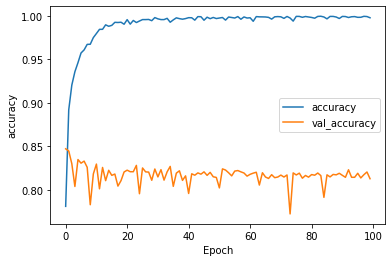

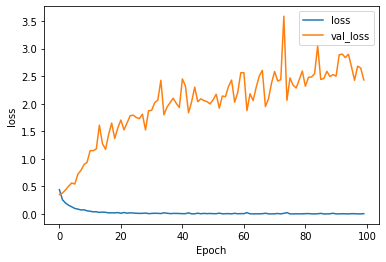

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epoch")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

In [0]:
import tensorflow
loaded_model=tensorflow.keras.models.load_model('saved_model/my_model') 
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                850       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 160,901
Trainable params: 160,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
print(labels)

'''
# Your Code Here
label_tokenizer = Tokenizer(oov_token="<00V>")
label_tokenizer.fit_on_texts(labels)
label_word_index=label_tokenizer.word_index
label_seq=label_tokenizer.texts_to_sequences(labels)

print(label_seq)
print(label_word_index)
'''

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 

'\n# Your Code Here\nlabel_tokenizer = Tokenizer(oov_token="<00V>")\nlabel_tokenizer.fit_on_texts(labels)\nlabel_word_index=label_tokenizer.word_index\nlabel_seq=label_tokenizer.texts_to_sequences(labels)\n\nprint(label_seq)\nprint(label_word_index)\n'

In [0]:
text=["viral photo captures incredible moment between police officer, homeless man"]

predict_tokenizer = Tokenizer(oov_token="<00V>")
predict_tokenizer.fit_on_texts(text)
predict_word_index=predict_tokenizer.word_index
predict_sequences=predict_tokenizer.texts_to_sequences(text)
token_list = pad_sequences(predict_sequences, maxlen=max_length, padding='post')

predicted = model.predict(token_list, verbose=0)


print(predicted)


[[2.990532e-15]]
